In [1]:
# import lib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.datasets import make_moons,make_classification,make_regression,make_circles
import sys
from mpl_toolkits.mplot3d import Axes3D 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

np.random.seed(23)
np.set_printoptions(precision=3,suppress=True)
def _sym_decorrelation(W):
    """ Symmetric decorrelation
    i.e. W <- (W * W.T) ^{-1/2} * W
    """
    s, u = np.linalg.eigh(np.dot(W, W.T))
    # u (resp. s) contains the eigenvectors (resp. square roots of
    # the eigenvalues) of W * W.T
    return np.dot(np.dot(u * (1./(np.sqrt(s+1e-2))+1e-8), u.T), W)

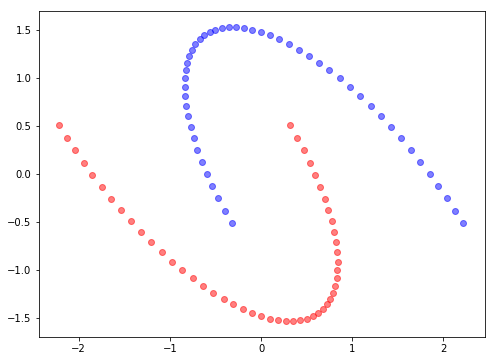

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA,KernelPCA

# See the data 
# X, y = make_moons(n_samples=300, noise=0.02)
X, y = make_moons(n_samples=100, random_state=123)
# X, y = make_circles(n_samples=300, noise=0.02,factor=0.5)
X = X @ np.array([
    [1,0],
    [1,2]
])
# X,y = make_regression(n_samples=400, n_features=1,noise=5); X = np.concatenate((X,y[:,None]),1) 

# ======== WE ARE CENTERING AND STD =======
X[:,1] = -X[:,1]
X = (X - X.mean(0))/X.std(0)
# ======== WE ARE CENTERING AND STD =======

plt.figure(figsize=(8,6))
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.show()

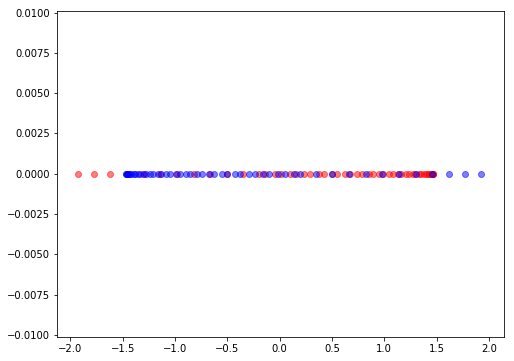

In [16]:
# PCA Sklearn 
one = PCA(n_components=1).fit_transform(X)
plt.figure(figsize=(8,6))
plt.scatter(one[y==0, 0], np.zeros((50,1)), color='red', alpha=0.5)
plt.scatter(one[y==1, 0], np.zeros((50,1)), color='blue', alpha=0.5)
plt.show()

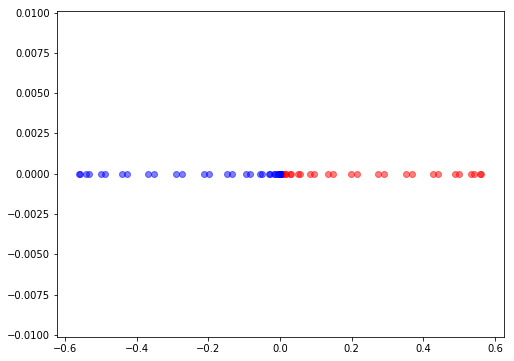

In [25]:
# PCA Sklearn 
one = KernelPCA(n_components=1,kernel='rbf',gamma=20).fit_transform(X)
plt.figure(figsize=(8,6))
plt.scatter(one[y==0, 0], np.zeros((50,1)), color='red', alpha=0.5)
plt.scatter(one[y==1, 0], np.zeros((50,1)), color='blue', alpha=0.5)
plt.show()

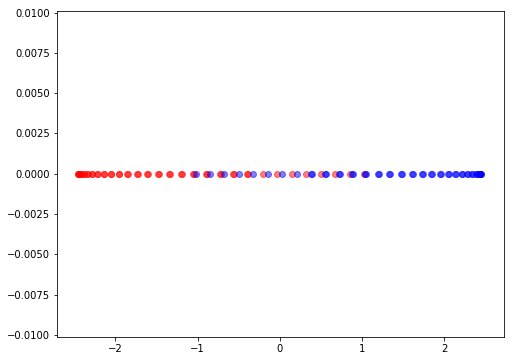

In [29]:
# LDA
one = LDA(n_components=1).fit_transform(X,y)
plt.figure(figsize=(8,6))
plt.scatter(one[y==0, 0], np.zeros((50,1)), color='red', alpha=0.5)
plt.scatter(one[y==1, 0], np.zeros((50,1)), color='blue', alpha=0.5)
plt.show()